Web Scraping Project
Neuton Fonseca
Scraping data from Yelp using Scrapy.

In [184]:
#loading the database
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
yelpdata = pd.read_csv('yelpreviews_final.csv', dtype={"phonenumber": str, "name": str, "userratingdate": str,
                                                       "userlocation": str, "delivery": str, "content": str,
                                                       "userlanguage": str, "overallrating": str, "price": str,
                                                       "userrating": str, "address": str, "typeoffood": str, "neighborhood": str})

In [185]:
#Cleaning the database
yelpdata['neighborhood'] = yelpdata['neighborhood'].astype(str)
yelpdata['neighborhood'] = list(map(lambda s: s.strip(), yelpdata['neighborhood']))
yelpdata['name'] = list(map(lambda s: s.strip(), yelpdata['name']))
yelpdata['overallrating'] = list(map(lambda s: s[0:3], yelpdata['overallrating']))
yelpdata['overallrating'] = yelpdata['overallrating'].astype(float)
yelpdata['userrating'] = list(map(lambda s: s[0:3], yelpdata['userrating']))
yelpdata['userrating'] = yelpdata['userrating'].astype(float)
yelpdata['phonenumber'] = yelpdata['phonenumber'].astype(str)
yelpdata['phonenumber'] = list(map(lambda s: s.strip(), yelpdata['phonenumber']))
yelpdata['address'] = yelpdata['address'].astype(str)
yelpdata['address'] = list(map(lambda s: s.strip(), yelpdata['address']))
yelpdata = yelpdata.drop('typeoffood', 1)
yelpdata = yelpdata.drop('userlanguage', 1)
yelpdata['userlocation'] = yelpdata['userlocation'].astype(str)
yelpdata['userstate'] = yelpdata.userlocation.str.split(',').apply(lambda x: x[-1]).str.strip()
yelpdata['delivery'] = yelpdata['delivery'].astype(str)
yelpdata['delivery'] = list(map(lambda s: s.strip(), yelpdata['delivery']))
A = yelpdata.address.str.split(',').apply(lambda x: x[-2:-1])
yelpdata['restcity'] = ["".join(A[i]) for i in list(range(len(A)))]

In [187]:
#Cleaning deeper:
yelpdata.loc[yelpdata['restcity'] == 'NY', 'restcity'] = 'New York'
yelpdata.loc[yelpdata['restcity'] == 'New York City', 'restcity'] = 'New York'
yelpdata['borough'] = yelpdata['restcity']
yelpdata.loc[(yelpdata['borough'] == 'New York') |
             (yelpdata['borough'] == 'Roosevelt Island') |
             (yelpdata['borough'] == 'Harlem')
             , 'borough'] = 'Manhattan'
yelpdata.loc[yelpdata['borough'] == 'Tompkinsville', 'borough'] = 'Staten Island'
yelpdata.loc[(yelpdata['borough'] == 'Astoria') |
             (yelpdata['borough'] == 'Ridgewood') |
             (yelpdata['borough'] == 'Forest Hills') |
             (yelpdata['borough'] == 'Long Island City') |
             (yelpdata['borough'] == 'Flushing') |
             (yelpdata['borough'] == 'Corona') |
             (yelpdata['borough'] == 'Elmhurst') |
             (yelpdata['borough'] == 'Sunnyside') |
             (yelpdata['borough'] == 'Woodside') |
             (yelpdata['borough'] == 'Jackson Heights')
             , 'borough'] = 'Queens'
yelpdata.loc[(yelpdata['borough'] == '') & (yelpdata['neighborhood'] == 'Meatpacking District, Chelsea'), 'borough'] = 'Manhattan'
yelpdata.loc[(yelpdata['borough'] == '') & (yelpdata['neighborhood'] == 'Chelsea'), 'borough'] = 'Manhattan'
yelpdata.loc[(yelpdata['borough'] == '') & (yelpdata['neighborhood'] == 'Lower East Side'), 'borough'] = 'Manhattan'
yelpdata.loc[(yelpdata['borough'] == '') & (yelpdata['neighborhood'] == 'Upper West Side'), 'borough'] = 'Manhattan'
yelpdata.loc[(yelpdata['borough'] == '') & (yelpdata['neighborhood'] == 'Long Island City'), 'borough'] = 'Queens'
yelpdata = yelpdata.loc[(yelpdata['borough'] != 'Jersey City') & (yelpdata['borough'] != 'Edgewater')]

In [204]:
#Still cleaning:
yelpdata['year'] = yelpdata.userratingdate.str.split('/').apply(lambda x: x[-1]).str.strip() 
yelpdata['day'] = yelpdata.userratingdate.str.split('/').apply(lambda x: x[1]).str.strip() 
yelpdata['month'] = yelpdata.userratingdate.str.split('/').apply(lambda x: x[0]).str.strip() 
yelpdata.loc[yelpdata['month'] == "1", 'month'] = 'January'
yelpdata.loc[yelpdata['month'] == "2", 'month'] = 'February'
yelpdata.loc[yelpdata['month'] == "3", 'month'] = 'March'
yelpdata.loc[yelpdata['month'] == "4", 'month'] = 'April'
yelpdata.loc[yelpdata['month'] == "5", 'month'] = 'May'
yelpdata.loc[yelpdata['month'] == "6", 'month'] = 'June'
yelpdata.loc[yelpdata['month'] == "7", 'month'] = 'July'
yelpdata.loc[yelpdata['month'] == "8", 'month'] = 'August'
yelpdata.loc[yelpdata['month'] == "9", 'month'] = 'September'
yelpdata.loc[yelpdata['month'] == "10", 'month'] = 'October'
yelpdata.loc[yelpdata['month'] == "11", 'month'] = 'November'
yelpdata.loc[yelpdata['month'] == "12", 'month'] = 'December'
yelpdatachart = yelpdata[['name','address','borough','delivery','phonenumber',
                              'neighborhood', 'overallrating','price']]
yelpdatachart = yelpdatachart.drop_duplicates()
yelpdatachart['price'].unique()

In [10]:
#List of restaurants with higher number of reviews
group = yelpdata.groupby(['name','restcity'])
group.overallrating.agg(['count','max']).sort_values(ascending=False, by= 'count').head(20)

,count,max
name,,
Ippudo East Village,8922,4.0
The Halal Guys,8484,4.5
Joe’s Shanghai,5681,4.0
Lombardi’s Pizza,5112,4.0
Totto Ramen,4438,4.0
The Meatball Shop,4428,4.0
Eataly,4400,4.0
Peter Luger,4118,4.0
Grimaldi’s,4094,3.5


In [247]:
#List of restaurants with higher ratings
group.overallrating.agg(['count','max']).sort_values(ascending=False, by= 'max').head(20)
#We can notice that some restaurants are rated with 5 stars but have a very small number of reviews. 
#So they shouldn't be considered.
#Considering only restaurants with more than 500 reviews.
A = pd.DataFrame(group.overallrating.agg(['count','max']).
                 sort_values(['max','count'], ascending=[False, False])).reset_index()
B = pd.DataFrame(A.loc[A['count'] >= 500])
B

,name,restcity,count,max
8,The Halal Guys,New York,8484,4.5
9,Gramercy Tavern,New York,2307,4.5
10,Del Frisco’s Double Eagle Steak House,New York,2159,4.5
11,Le Bernardin,New York,1972,4.5
12,Los Tacos No.1,,1879,4.5
13,The Boil,New York,1830,4.5
14,Amélie,New York,1736,4.5
15,Traif,Brooklyn,1674,4.5
16,Eleven Madison Park,New York,1646,4.5
17,Upstate,New York,1413,4.5


In [91]:
yelpdata.columns

Index(['phonenumber', 'name', 'userratingdate', 'userlocation', 'delivery',
       'content', 'overallrating', 'price', 'userrating', 'address',
       'neighborhood', 'userstate', 'restcity'],
      dtype='object')

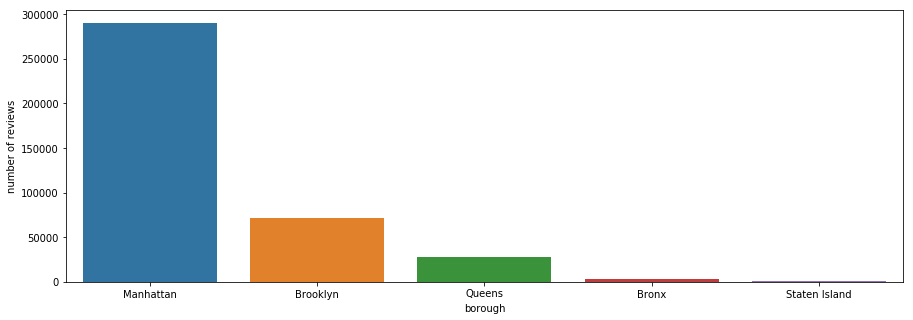

In [386]:
#Creating a plot of reviews per borough
f, ax = plt.subplots(figsize=(15, 5))
B1 = yelpdata.groupby('borough').overallrating.agg(['count','mean']).sort_values(['count','mean'], ascending=[False, False]).reset_index()
sns.barplot(x='borough', y='count', data=B1)
ax.set(ylabel='number of reviews')

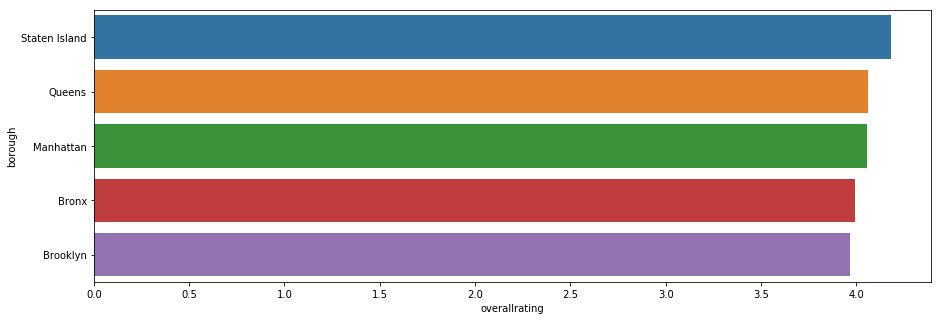

In [387]:
#Creating a plot of overallrating per borough
B2 = yelpdata.groupby('borough').overallrating.agg(['count','mean']).sort_values(['mean','count'], ascending=[False, False]).reset_index()
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='mean', y='borough', data=B2)
ax.set(xlabel='overallrating')

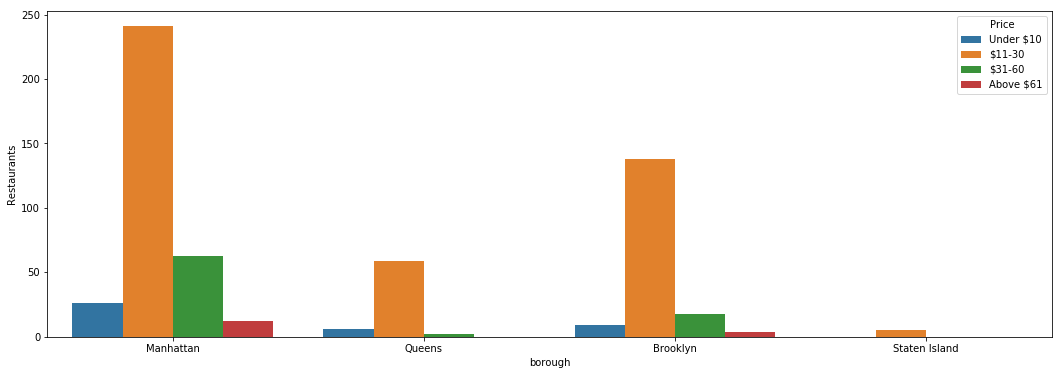

In [385]:
#Creating a plot of restaurants per borough and price categories
f, ax = plt.subplots(figsize=(18, 6))
Y2 = pd.DataFrame(yelpdatachart.groupby(['borough','price']).overallrating.count()).reset_index()
Y2['price'] = pd.Categorical(Y2['price'], ['Under $10', '$11-30', '$31-60', 'Above $61'])
Y2['borough'] = pd.Categorical(Y2['borough'], ['Manhattan','Queens','Brooklyn','Staten Island'])
Y2 = Y2.sort_values('price')
Y2 = Y2.sort_values('borough')
sns.barplot(x="borough", y="overallrating", hue = 'price', data=Y2)
ax.set(ylabel='Restaurants')
plt.legend(loc='upper right',title='Price')

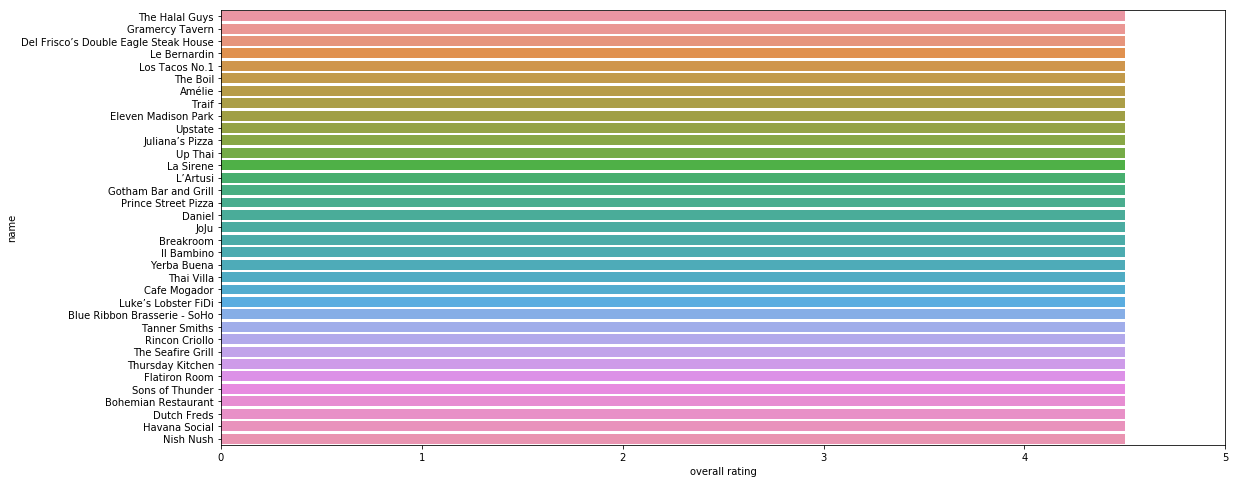

In [248]:
#Top 35 restaurants with the highest rating and ordered by number of reviews (More than 500 reviews)
f, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x='max', y='name', data=B.head(35))
ax.set(xlim=(0, 5.0))
ax.set(xlabel='overall rating')

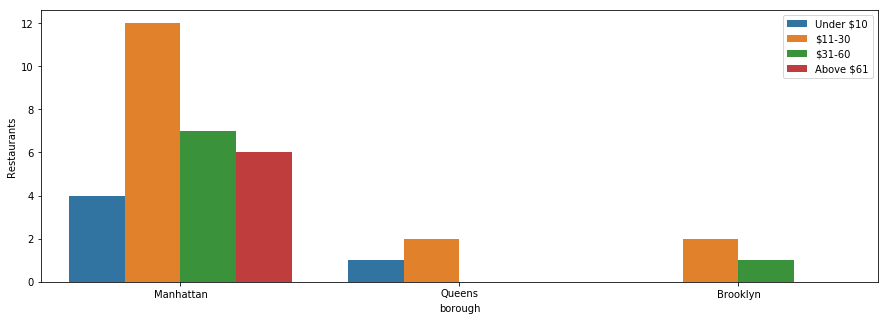

In [286]:
#Best rated restaurants with more than 500 reviews
new = yelpdata.loc[yelpdata['overallrating'] >= 4.5]
new = pd.DataFrame(new.groupby(['name','borough','price']).overallrating.count().sort_values(ascending=False)).reset_index()
new = new.loc[new['overallrating'] >= 500]
new['price'] = pd.Categorical(new['price'], ['Under $10', '$11-30', '$31-60', 'Above $61'])
new['borough'] = pd.Categorical(new['borough'], ['Manhattan','Queens','Brooklyn'])
new = new.sort_values('price')
new = new.sort_values('borough')
new2 = pd.DataFrame(new.groupby(['name','borough','price']).overallrating.count().sort_values(ascending=False)).reset_index()
new3 = pd.DataFrame(new2.groupby(['borough','price']).overallrating.sum().sort_values(ascending=False)).reset_index()
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="borough", y="overallrating", hue = 'price', data=new3)
plt.ylabel('Restaurants')
plt.legend(loc='upper right')

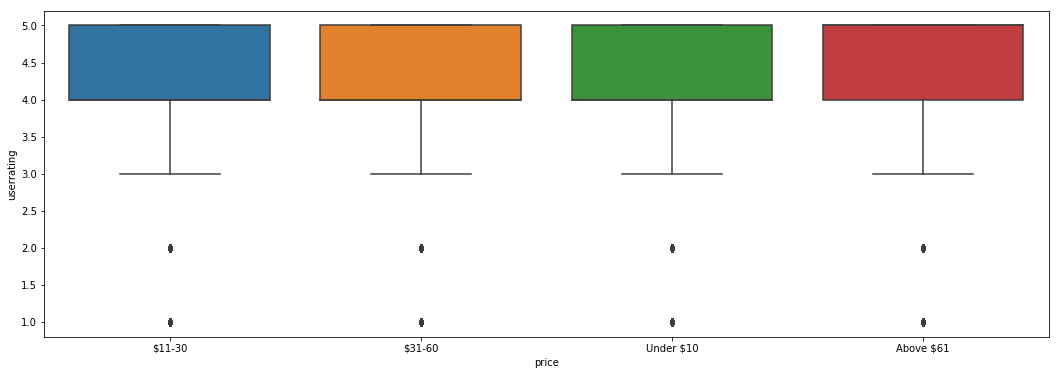

In [149]:
#The price does not seem to have any relation with the ratings.
f, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(x="price", y="userrating", data=yelpdata)

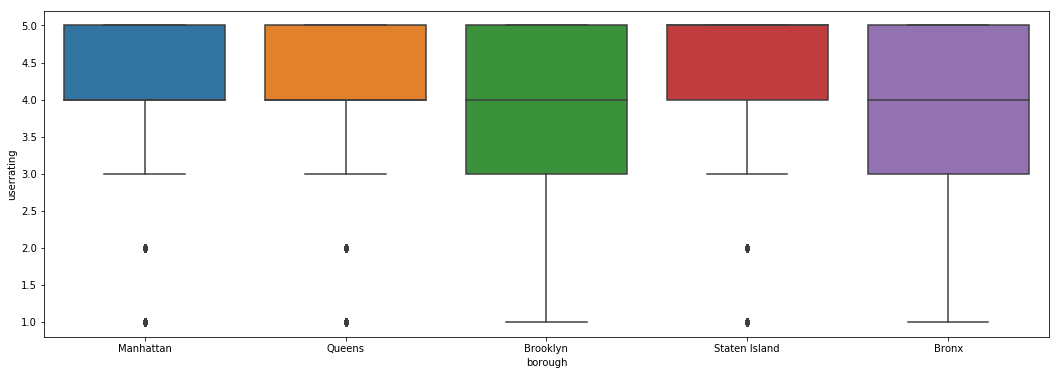

In [151]:
#Creating a plot of user rating per borough
f, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(x="borough", y="userrating", data=yelpdata)

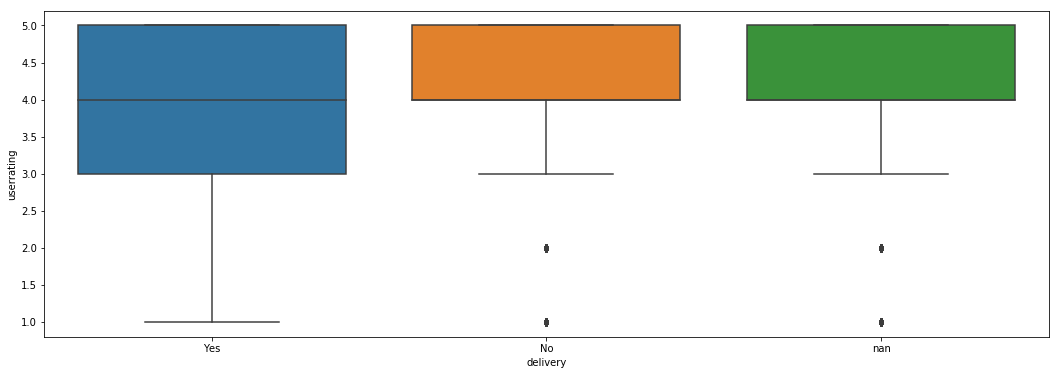

In [287]:
#Creating a plot to check if the delivery has impact on the data
f, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(x="delivery", y="userrating", data=yelpdata)

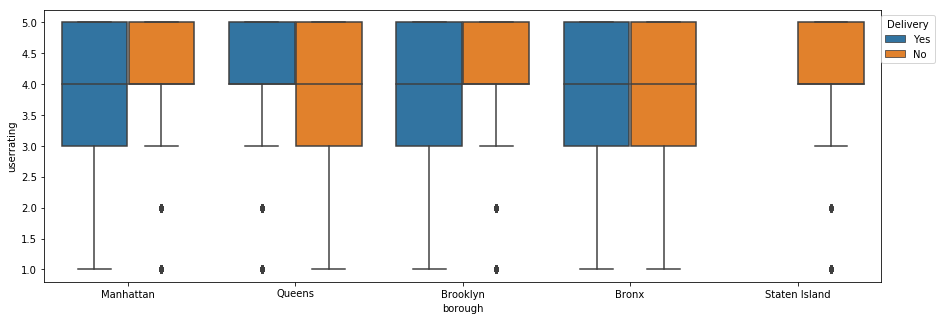

In [388]:
#Creating a plot to check if the delivery has more impact when analyzed by borough
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="borough", y="userrating", hue='delivery', data=yelpdata.loc[yelpdata['delivery'] != 'nan'])
plt.legend(bbox_to_anchor=(1.07, 1), loc=1, title='Delivery')

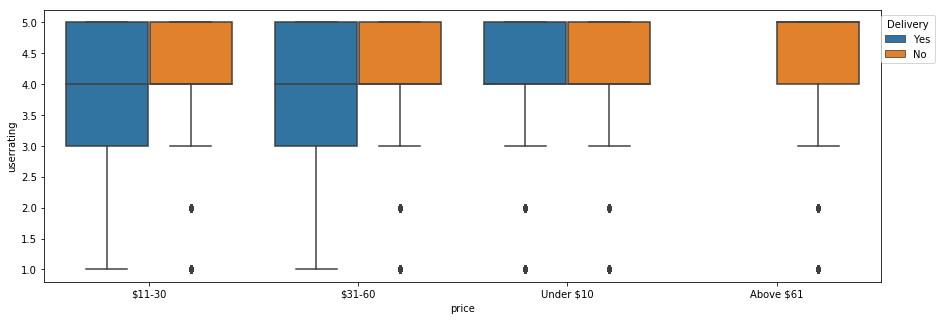

In [389]:
#Comparing the data per price to analyze the impact of the delivery.
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="price", y="userrating", hue='delivery', data=yelpdata.loc[yelpdata['delivery'] != 'nan'])
plt.legend(bbox_to_anchor=(1.07, 1), loc=1, title='Delivery')

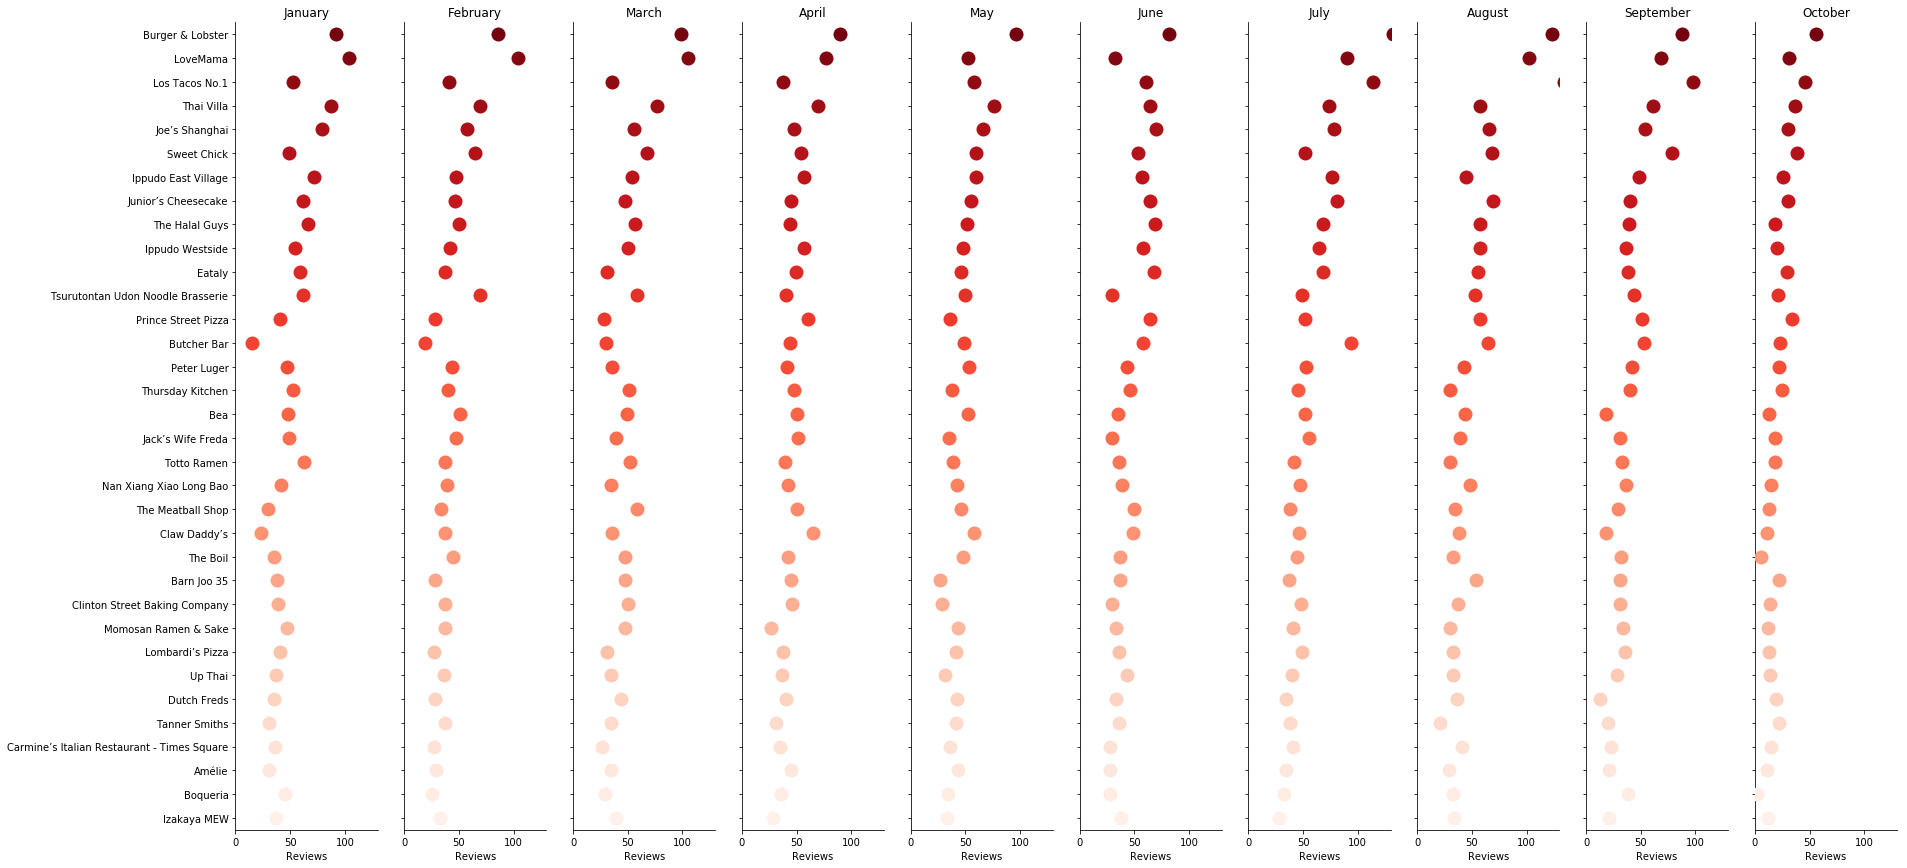

In [377]:
#Creating a plot to check which restaurants with more than 300 reviews on 2017 have a recent increase of the number of reviews
#They can be on a spotlight of "restaurants of the moment"
test = Y4.pivot_table('userlocation','name','month')
test = test.reindex_axis(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                  'October'], axis=1)
test['Total_2017'] = test['January'] + test['February'] + test['March'] + test['April'] + test['May'] + test['June'] + test['July'] + test['August'] + test['September'] + test['October']
test = test.sort_values('Total_2017', ascending=False)
test = pd.DataFrame(test).reset_index()
test = test.loc[test['Total_2017'] >= 300]
g = sns.PairGrid(test,
                 x_vars=test.columns[1:11], y_vars=["name"],
                 size=12, aspect=.2)
g.map(sns.stripplot, size=14, orient="h",
      palette="Reds_r", edgecolor="gray")
g.set(xlim=(0, 130), xlabel="Reviews", ylabel="")
titles = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)

In [343]:
Y4 = yelpdata.loc[yelpdata['year'] == '2017']
Y4 = pd.DataFrame(Y4.groupby(['name','month']).userlocation.count()).reset_index()
Y4['userlocation'] = Y4['userlocation'].astype(int)
Y4

,name,month,userlocation
0,1803,August,1
1,33 Greenwich,April,9
2,33 Greenwich,August,7
3,33 Greenwich,July,8
4,33 Greenwich,June,10
5,33 Greenwich,May,16
6,33 Greenwich,October,1
7,33 Greenwich,September,4
8,983-Bushwick’s Living Room,April,2
9,983-Bushwick’s Living Room,February,3


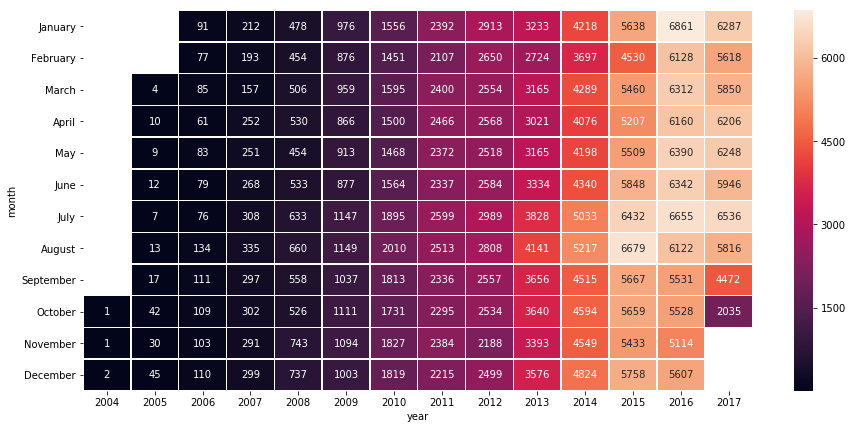

In [390]:
#Checking how the reviews are distributed per month and year
S1 = pd.DataFrame(yelpdata.groupby(['year','month']).userstate.count()).reset_index()

S1['month'] = pd.Categorical(S1['month'], ['January','February','March','April','May',
                                                  'June','July','August','September','October',
                                                  'November','December'])
S1.sort_values('month')
test = S1.pivot("month", "year", "userstate")
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(test, annot=True, fmt='g', linewidths=.5, ax=ax)

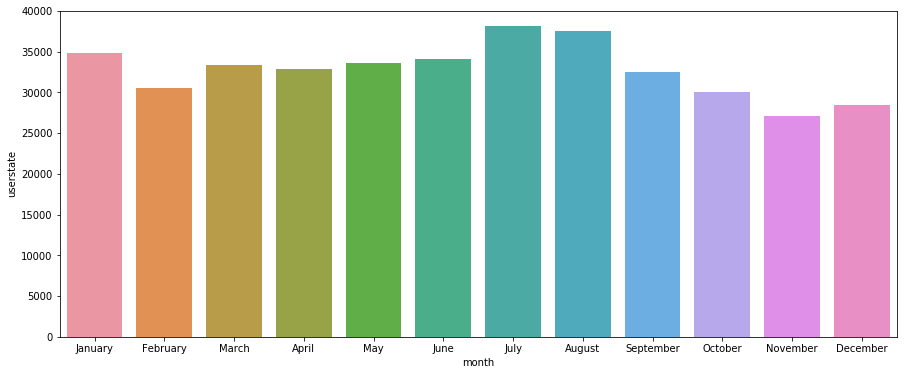

In [222]:
#Is there any month with a higher frequency of reviews regardless of the year?
Y1 = pd.DataFrame(yelpdata.groupby('month').userstate.count().sort_values()).reset_index()
Y1['month'] = pd.Categorical(Y1['month'], ['January','February','March','April','May',
                                                  'June','July','August','September','October',
                                                  'November','December'])
Y1 = Y1.sort_values('month')
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='month', y='userstate', data=Y1)

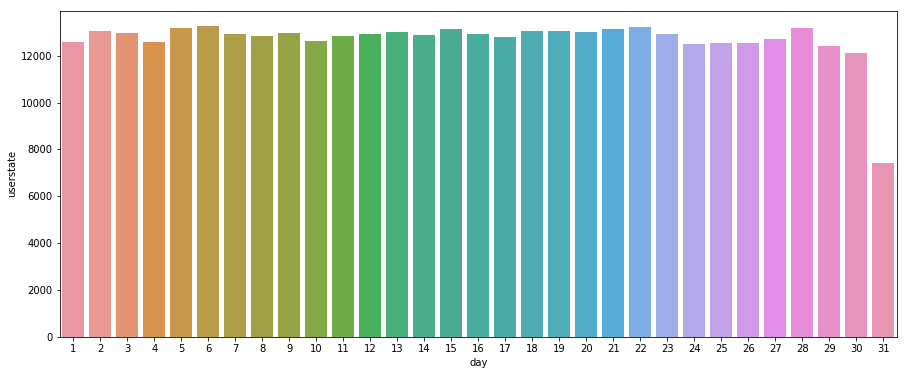

In [228]:
#Is there any day with more reviews regardless of the year and the month?
Y2 = pd.DataFrame(yelpdata.groupby('day').userstate.count()).reset_index()
Y2['day'] = Y2['day'].astype(int)
Y2.sort_values('day')
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='day', y='userstate', data=Y2)

In [236]:
yelpdata.columns

Index(['phonenumber', 'name', 'userratingdate', 'userlocation', 'delivery',
       'content', 'overallrating', 'price', 'userrating', 'address',
       'neighborhood', 'userstate', 'restcity', 'borough', 'year', 'day',
       'month', 'short_address', 'id'],
      dtype='object')

In [143]:
#This is the end.